#Input Data

In [ ]:
import json

label = []
text = []
with open('./Resume.txt', 'r') as f:
  lines = f.readlines()

for line in lines:
  data = json.loads(line)
  entities = []

  for annotation in data['annotation']:
    point = annotation['points'][0]
    labels = annotation['label']

    if not isinstance(labels, list):
      labels = [labels]

    for i in labels:
      label.append(i)
      text.append(point['text'])

In [ ]:
label[:5]

['Skills', 'Skills', 'College Name', 'College Name', 'Graduation Year']

In [ ]:
text[:5]

['\n• Programming language: C, C++, Java\n• Oracle PeopleSoft\n• Internet Of Things\n• Machine Learning\n• Database Management System\n• Computer Networks\n• Operating System worked on: Linux, Windows, Mac\n\nNon - Technical Skills\n\n• Honest and Hard-Working\n• Tolerant and Flexible to Different Situations\n• Polite and Calm\n• Team-Player',
 'C (Less than 1 year), Database (Less than 1 year), Database Management (Less than 1 year),\nDatabase Management System (Less than 1 year), Java (Less than 1 year)',
 'Kendriya Vidyalaya',
 'Woodbine modern school',
 '2017\n']

In [ ]:
import pandas as pd

data = pd.DataFrame({'Text':text,
                     'Label':label})
data

,Text,Label
0,"\n• Programming language: C, C++, Java\n• Orac...",Skills
1,"C (Less than 1 year), Database (Less than 1 ye...",Skills
2,Kendriya Vidyalaya,College Name
3,Woodbine modern school,College Name
4,2017\n,Graduation Year
...,...,...
3551,B- Tech\n,Degree
3552,Security Analyst,Designation
3553,Infosys - Career Contour,Companies worked at
3554,Security Analyst,Designation


In [ ]:
data.to_csv('Data CV (RAW).csv',index=False)

In [ ]:
data['Label'].value_counts()

Companies worked at    729
Designation            521
Skills                 472
Location               430
College Name           330
Degree                 298
Graduation Year        254
Email Address          252
Name                   224
Years of Experience     44
UNKNOWN                  2
Name: Label, dtype: int64

In [ ]:
data[data['Label']=='UNKNOWN']

,Text,Label
1247,"Oracle 10g, 11g, 12c",UNKNOWN
3015,2012\n,UNKNOWN


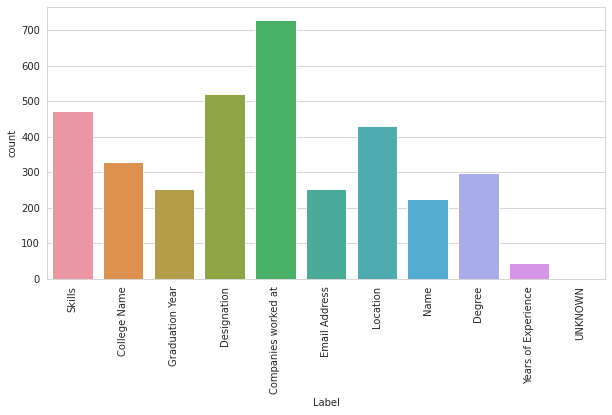

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x = 'Label', data=data)
plt.xticks(rotation=90)
plt.show()

#Preprocessing Data

##Label Encoder

In [ ]:
#Multi Categorical
from sklearn.preprocessing import LabelEncoder
df = data.copy()

label_encode = LabelEncoder().fit(df['Label'])
df['Label'] = label_encode.transform(df['Label'])
df

,Text,Label
0,"\n• Programming language: C, C++, Java\n• Orac...",8
1,"C (Less than 1 year), Database (Less than 1 ye...",8
2,Kendriya Vidyalaya,0
3,Woodbine modern school,0
4,2017\n,5
...,...,...
3551,B- Tech\n,2
3552,Security Analyst,3
3553,Infosys - Career Contour,1
3554,Security Analyst,3


In [ ]:
for i in range(len(label_encode.classes_)):
  print('{} -> {}'.format(i, label_encode.classes_[i]))

0 -> College Name
1 -> Companies worked at
2 -> Degree
3 -> Designation
4 -> Email Address
5 -> Graduation Year
6 -> Location
7 -> Name
8 -> Skills
9 -> UNKNOWN
10 -> Years of Experience


##Remove Stopwords

In [ ]:
#Menghilangkan stopwords pada data
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

stop_words = stopwords.words('english')
cleaned_data = []

for i in range(len(data)):
  if (data.iloc[i]['Label']=='Graduation Year'):
    review = re.sub('[^0-9,]', "", data.iloc[i]['Text'])
  else:
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['Text']) #menghilangkan punctuation dan angka
    review = review.lower().split() #lowercase dan split

    review = [word for word in review if (word not in stop_words)] #melakukan stemming dan menghilangkan stopwords
    review = ' '.join(review) #digabungkan
    
  cleaned_data.append(review) #disimpan dalam variable cleaned_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Text'][:5]

0    \n• Programming language: C, C++, Java\n• Orac...
1    C (Less than 1 year), Database (Less than 1 ye...
2                                   Kendriya Vidyalaya
3                               Woodbine modern school
4                                               2017\n
Name: Text, dtype: object

In [ ]:
cleaned_data[:5]

['programming language c c java oracle peoplesoft internet things machine learning database management system computer networks operating system worked linux windows mac non technical skills honest hard working tolerant flexible different situations polite calm team player',
 'c less year database less year database management less year database management system less year java less year',
 'kendriya vidyalaya',
 'woodbine modern school',
 '2017']

In [ ]:
df['Text'] = cleaned_data
df

,Text,Label
0,programming language c c java oracle peoplesof...,8
1,c less year database less year database manage...,8
2,kendriya vidyalaya,0
3,woodbine modern school,0
4,2017,5
...,...,...
3551,b tech,2
3552,security analyst,3
3553,infosys career contour,1
3554,security analyst,3


#Transformer

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 12.6 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 6.5 MB 38.7 MB/s 
     |████████████████████████████████| 596 kB 40.6 MB/s 
     |████████████████████████████████| 895 kB 42.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
seqlen = data['Text'].apply(lambda x: len(x.split()))
seqlen.sort_values(ascending=False)

1973    352
792     236
1795    208
1534    166
804     140
       ... 
2414      1
1400      1
936       1
2411      1
1522      1
Name: Text, Length: 3556, dtype: int64

In [ ]:
data.loc[1973, 'Text']

'\nside debugging.\n• Hands on experience of Visual Studio debugger for debugging on Windows\nplatform.\n• Working experience of Multithreaded applications for more than eight years\n• Good understanding of OOPS Design principles and STL.\n• Experienced in using various debuggers that include GDB debugger, Eclipse, VC++ IDE, Trace\n32, WinDbg, Visual Studio.\n• Good knowledge of Big data technologies(Hadoop, Yarn Architecture, map-\nreduce, Hive, Sqoop, Hbase, Zookeeper)\n• Good experience in Hadoop development and Admin activities.\n• Able to understand and review Java and Scala code\n• Good Exposure to Software practices, SDLC.\n• Good understanding and porting knowledge of framework components.\n• Good understanding of multimedia concepts, Audio video synchronization,\nAudioOut, AudioIn and video zoom.\n• Knowledge of WEBRTC features.\n• Good knowledge of video Engine.\n• Basic knowledge of MFC, socket programming.\n• Good knowledge in programming and operating system concepts.\n• E

In [ ]:
import numpy as np
from transformers import AutoTokenizer

SEQ_LEN = 352  # we will cut/pad our sequences to a length of 50 tokens

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

def tokenize(sentence):
    tokens = tokenizer.encode_plus(sentence, max_length=SEQ_LEN,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_attention_mask=True,
                                   return_token_type_ids=False, return_tensors='tf')
    return tokens['input_ids'], tokens['attention_mask']

# initialize two arrays for input tensors
Xids = np.zeros((len(df), SEQ_LEN))
Xmask = np.zeros((len(df), SEQ_LEN))

for i, sentence in enumerate(df['Text']):
    Xids[i, :], Xmask[i, :] = tokenize(sentence)
    if i % 10000 == 0:
        print(i)  # do this so we can see some progress

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

0


In [ ]:
Xids[:5]

array([[  101.,  4159.,  1846., ...,     0.,     0.,     0.],
       [  101.,   172.,  1750., ...,     0.,     0.,     0.],
       [  101.,   180.,  6696., ...,     0.,     0.,     0.],
       [  101.,  3591., 16405., ...,     0.,     0.,     0.],
       [  101.,  1504.,   102., ...,     0.,     0.,     0.]])

In [ ]:
Xmask[:5]

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [ ]:
labels = df['Label'].values
labels[:5]

array([8, 8, 0, 0, 5])

#Data Mapping & Splitting

In [ ]:
import tensorflow as tf

BATCH_SIZE = 32  # we will use batches of 32

# load arrays into tensorflow dataset
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

# create a mapping function that we use to restructure our dataset
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

# using map method to apply map_func to dataset
dataset = dataset.map(map_func)

# shuffle data and batch it
dataset = dataset.shuffle(100000).batch(BATCH_SIZE)

In [ ]:
for i in dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(352,), dtype=float64, numpy=
array([  101., 17599.,  7301.,  4964.,   102.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,

In [ ]:
# get the length of the batched dataset
DS_LEN = len(dataset)
SPLIT = 0.9  # 90-10 split

train = dataset.take(round(DS_LEN*SPLIT)) 
val = dataset.skip(round(DS_LEN*SPLIT))
test = val.ta

#Model

In [ ]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from transformers import TFAutoModel

# initialize cased BERT model
bert = TFAutoModel.from_pretrained('bert-base-cased')

input_ids = tf.keras.layers.Input(shape=(352,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(352,), name='attention_mask', dtype='int32')

# we consume the last_hidden_state tensor from bert (discarding pooled_outputs)
embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.LSTM(64)(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(11, activation='softmax', name='outputs')(X)

# define input and output layers of our model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# freeze the BERT layer - otherwise we will be training 100M+ parameters...
model.layers[2].trainable = False

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

history = model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
101/101 [==============================] - 221s 2s/step - loss: 0.7632 - accuracy: 0.7593 - val_loss: 0.7407 - val_accuracy: 0.7963
Epoch 2/10
101/101 [==============================] - 192s 2s/step - loss: 0.4959 - accuracy: 0.8478 - val_loss: 0.4699 - val_accuracy: 0.8827
Epoch 3/10
101/101 [==============================] - 192s 2s/step - loss: 0.4573 - accuracy: 0.8537 - val_loss: 0.3964 - val_accuracy: 0.8642
Epoch 4/10
101/101 [==============================] - 192s 2s/step - loss: 0.4285 - accuracy: 0.8645 - val_loss: 0.3689 - val_accuracy: 0.9074
Epoch 5/10
101/101 [==============================] - 192s 2s/step - loss: 0.4126 - accuracy: 0.8741 - val_loss: 0.2515 - val_accuracy: 0.9136
Epoch 6/10
101/101 [==============================] - 192s 2s/step - loss: 0.3583 - accuracy: 0.8877 - val_loss: 0.3205 - val_accuracy: 0.9074
Epoch 7/10
101/101 [==============================] - 192s 2s/step - loss: 0.3421 - accuracy: 0.8960 - val_loss: 0.2223 - val_accuracy: 0.9352

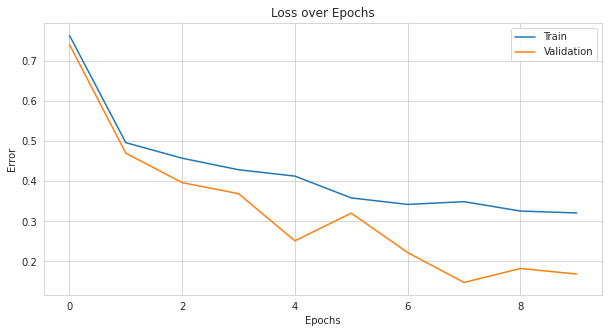

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title('Loss over Epochs')
plt.legend(loc='upper right')
plt.show()

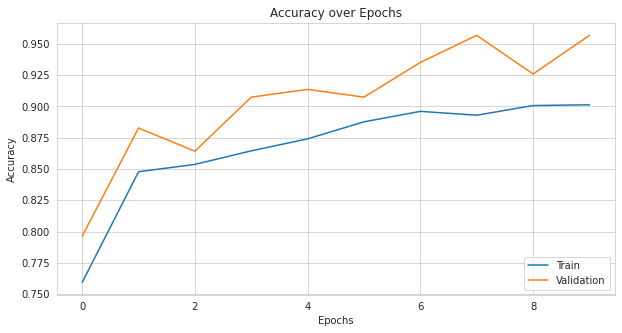

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy over Epochs')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('model.h5')

#Evaluasi Model

In [ ]:
val_unbatch = val.unbatch()

In [ ]:
model.evaluate(val)

11/11 [==============================] - 16s 1s/step - loss: 0.1979 - accuracy: 0.9537


[0.19792860746383667, 0.9537037014961243]

In [ ]:
np.argmax(pred[:10],axis=1)

array([8, 8, 2, 1, 3, 6, 8, 0, 3, 1])

In [ ]:
print(len(pred))

324


In [ ]:
pred = []
y_test = []
for i in val:
  predict = model.predict(i[0])
  ar = np.array(i[1])
  pred.append(predict)
  y_test.append(ar)

In [ ]:
test = []
pred_final = []
for i in range(len(y_test)):
  for j in y_test[i]:
    test.append(j)
  for z in np.argmax(pred[i],axis=1):
    pred_final.append(z)

In [ ]:
test = np.array(test)
pred_final = np.array(pred_final)

In [ ]:
print(pred_final[:10])
print(test[:10])

[3 7 3 8 5 8 4 2 1 6]
[3 7 3 3 5 8 4 2 1 6]


In [ ]:
len(pred_final), len(test)

(324, 324)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
acc = accuracy_score(test, pred_final) * 100
print('{:.2f}%'.format(acc))

93.52%


In [ ]:
print(classification_report(test, pred_final))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.96      0.92      0.94        74
           2       1.00      0.87      0.93        30
           3       1.00      0.88      0.94        51
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        29
           7       0.83      1.00      0.90        19
           8       0.77      0.88      0.82        41
          10       1.00      1.00      1.00         5

    accuracy                           0.94       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.94      0.94      0.94       324



0. -> College Name
1. -> Companies worked at
2. -> Degree
3. -> Designation
4. -> Email Address
5. -> Graduation Year
6. -> Location
7. -> Name
8. -> Skills
9. -> UNKNOWN
10. -> Years of Experience

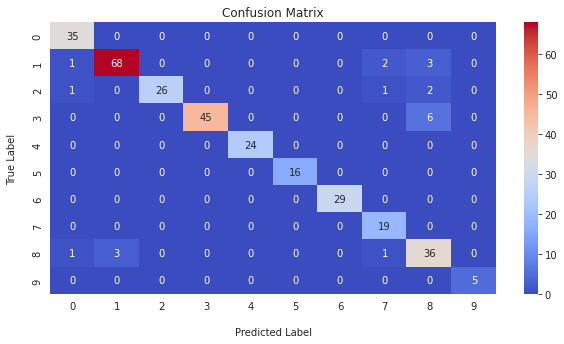

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(test, pred_final)
            ,annot=True,cmap='coolwarm',fmt='g')
plt.ylabel('True Label\n')
#plt.yticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
#plt.xticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xlabel('\nPredicted Label')
plt.title('Confusion Matrix')
plt.show()